In [125]:
# Imports
from PIL import Image
import numpy as np
import cv2
import math
from scipy.fft import dct
import matplotlib.pyplot as plt

In [6]:
#convert image to grey scale
im = cv2.imread('data/yasuo.jpeg')
im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

In [16]:
#getting an 8x8 block
init_x=100
init_y=100
block = im[init_x:init_x+8, init_y:init_y+8]

In [30]:
block

array([[43, 58, 53, 27, 24, 53, 47, 51],
       [47, 53, 43, 26, 34, 48, 38, 43],
       [53, 48, 34, 26, 35, 39, 38, 46],
       [56, 45, 28, 27, 31, 32, 43, 52],
       [51, 40, 36, 11, 39, 31, 47, 28],
       [46, 42, 33, 11, 37, 36, 38, 36],
       [39, 45, 29, 14, 34, 40, 28, 44],
       [33, 47, 26, 17, 33, 39, 26, 42]], dtype=uint8)

In [18]:
#define c function used in DCT
def c_funct(i):
    if i==0:
        return 1/(2**(1/2))
    else:
        return 1

In [44]:
def dct_matrix():
    result_matrix = np.zeros(shape=(8,8))
    sum = 0
    for i in range(8):
        for j in range(8):
            if i ==0:
                result_matrix[i,j] = np.sqrt(1/8)
            else:
                result_matrix[i,j] = np.sqrt(2/8)*math.cos(((2*j+1)*i*math.pi)/16)
    return result_matrix

In [106]:
np.round(dct_matrix(), 3)

array([[ 0.354,  0.354,  0.354,  0.354,  0.354,  0.354,  0.354,  0.354],
       [ 0.49 ,  0.416,  0.278,  0.098, -0.098, -0.278, -0.416, -0.49 ],
       [ 0.462,  0.191, -0.191, -0.462, -0.462, -0.191,  0.191,  0.462],
       [ 0.416, -0.098, -0.49 , -0.278,  0.278,  0.49 ,  0.098, -0.416],
       [ 0.354, -0.354, -0.354,  0.354,  0.354, -0.354, -0.354,  0.354],
       [ 0.278, -0.49 ,  0.098,  0.416, -0.416, -0.098,  0.49 , -0.278],
       [ 0.191, -0.462,  0.462, -0.191, -0.191,  0.462, -0.462,  0.191],
       [ 0.098, -0.278,  0.416, -0.49 ,  0.49 , -0.416,  0.278, -0.098]])

In [132]:
def dct_funct(block):
    return np.matrix(dct_matrix()) * np.matrix(block) * np.matrix(dct_matrix().transpose())

def idct_funct(block):
    return np.matrix(dct_matrix().transpose()) * np.matrix(block) * np.matrix(dct_matrix())

def round(block_val, q_mat_val):
    if block_val>0:
        return (block_val+np.round(q_mat_val/2))/q_mat_val
    else:
        return (block_val-np.round(q_mat_val/2))/q_mat_val

def quantization(block, q_mat):
    result_mat = np.zeros(shape=(8,8))
    for i in range(8):
        for j in range(8):
            result_mat[i,j] = round(block[i,j], q_mat[i,j])
    
    return result_mat

def inv_quantization(block, q_mat):
    result_mat = np.zeros(shape=(8,8))
    for i in range(8):
        for j in range(8):
            result_mat[i,j] = block[i,j]*q_mat[i,j]
    return result_mat

In [133]:
quant_mat = np.matrix([[16,11,10,16,24,40,51,61],
            [12,12,14,19,26,58,60,55],
            [14,13,16,24,40,57,69,56],
            [14,17,22,29,51,87,80,62],
            [18,22,37,56,68,109,103,77],
            [24,35,55,64,81,104,113,92],
            [49,64,78,87,103,121,120,101],
            [72,92,95,98,112,100,103,99]])

In [134]:
block

array([[43, 58, 53, 27, 24, 53, 47, 51],
       [47, 53, 43, 26, 34, 48, 38, 43],
       [53, 48, 34, 26, 35, 39, 38, 46],
       [56, 45, 28, 27, 31, 32, 43, 52],
       [51, 40, 36, 11, 39, 31, 47, 28],
       [46, 42, 33, 11, 37, 36, 38, 36],
       [39, 45, 29, 14, 34, 40, 28, 44],
       [33, 47, 26, 17, 33, 39, 26, 42]], dtype=uint8)

In [135]:
np.round(dct_funct(block),0)

matrix([[302.,   8.,  52.,  18., -18., -27.,   6.,   7.],
        [ 30.,   4.,   4.,  -9.,  -9.,  12.,   4.,  -6.],
        [  4.,  -4.,  -7., -11., -13., -13.,   9., -16.],
        [  2.,   1.,  -1.,   2., -15.,   4.,   3.,  11.],
        [  2.,  -2.,   3.,  -4.,  -3.,   6.,  -4.,   0.],
        [  5.,  -5.,   8.,  -7.,   5.,  -0.,   2.,  -9.],
        [  0.,  -0.,   1.,  -1.,  -1.,   1.,  -0.,   1.],
        [ -2.,   2.,  -3.,   3.,  -4.,   0.,   0.,   6.]])

In [136]:
#quantization of block
quant_block = quantization(dct_funct(block), quant_mat)


In [137]:
#inverse quantization
inv_quant_block = inv_quantization(quant_block, quant_mat)


In [139]:
inv_dct = idct_funct(inv_quant_block)

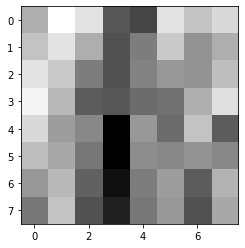

In [140]:
plt.imshow(block,cmap='gray')

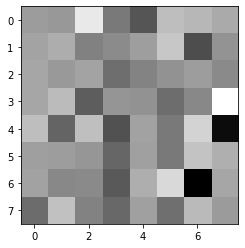

In [141]:
plt.imshow(inv_dct, cmap='gray')

## Compressing the entire image

In [162]:
# compressing the entire image
im = cv2.imread('data/yasuo.jpeg')
im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
image_cropped = im[0:224, 0:224]

In [161]:
quant_mat = np.matrix([[16,11,10,16,24,40,51,61],
            [12,12,14,19,26,58,60,55],
            [14,13,16,24,40,57,69,56],
            [14,17,22,29,51,87,80,62],
            [18,22,37,56,68,109,103,77],
            [24,35,55,64,81,104,113,92],
            [49,64,78,87,103,121,120,101],
            [72,92,95,98,112,100,103,99]])

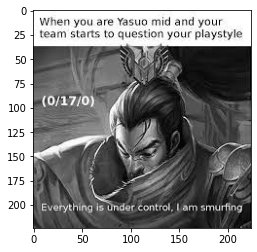

In [153]:
plt.imshow(im[0:224, 0:224], cmap='gray')

In [164]:
result = np.zeros(shape=(224,224))
for i in range(int(224/8)):
    for j in range(int(224/8)):
        block = im[i*8:(i+1)*8, j*8:(j+1)*8]
        dct = dct_funct(block)
        quant = quantization(dct, quant_mat)
        iquant = inv_quantization(quant, quant_mat)
        idct = idct_funct(iquant)
        result[i*8:(i+1)*8, j*8:(j+1)*8] = idct

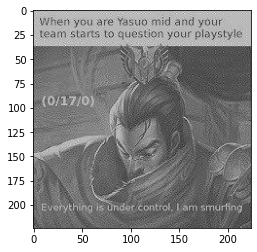

In [165]:
plt.imshow(result, cmap='gray')